In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]



In [3]:
data = pd.read_csv('creditcard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]

In [7]:
### Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.95)

In [8]:
len(X_train)

14240

In [9]:
### Over sampling 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [10]:
len(X_train)

28438

In [11]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')

In [12]:
model_svm = model.fit(X_train.values, y_train.values)

In [ ]:
model.score(X_test.values, y_test.values)

In [69]:
y_svm_predict = model.predict(X_test.values)

In [23]:
print(classification_report(y_test, y_svm_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.00      0.00      0.00       103

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\mehedi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehedi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehedi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
cf_mtx= confusion_matrix(y_test, y_svm_predict)
cf_mtx

array([[56855,     0],
       [  107,     0]], dtype=int64)

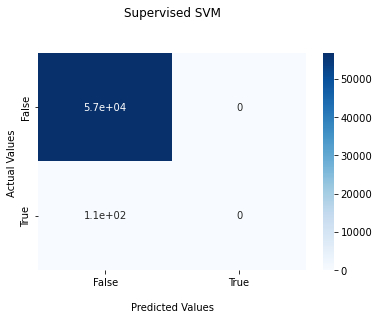

In [73]:
import seaborn as sns

ax = sns.heatmap(cf_mtx, annot=True, cmap='Blues')

ax.set_title('Supervised SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [27]:
### k mean algrithm 

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [28]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(X)
    sse.append(km.inertia_)

In [29]:
sse

[642290673946060.9,
 118320091123640.52,
 63002787438091.97,
 35678883143288.45,
 23684019213767.867,
 17435830965509.719,
 11875441064443.213,
 9450198694863.98,
 7510435539176.275]

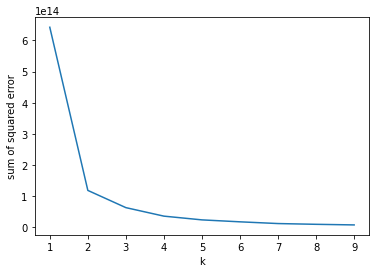

In [30]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng, sse)

In [33]:
km = KMeans(n_clusters = 2)
model_kmean = km.fit(X_train.values)

In [34]:
y_prdicted = km.predict(X_test.values)

In [37]:
score = accuracy_score(km.predict(X_test), y_test)
score

C:\Users\mehedi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


0.4655910958182648

In [38]:
print(classification_report(y_test, y_prdicted))

              precision    recall  f1-score   support

           0       1.00      0.47      0.63     56859
           1       0.00      0.72      0.00       103

    accuracy                           0.47     56962
   macro avg       0.50      0.59      0.32     56962
weighted avg       1.00      0.47      0.63     56962



In [39]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_prdicted)
cf_matrix

array([[26447, 30412],
       [   29,    74]], dtype=int64)

In [40]:
### new data set making as k mean clasifier 
km.fit(X)
target_Cls = km.predict(X)

In [41]:
len(target_Cls)

284807

In [42]:
inputs = data['targetClass'] = target_Cls

In [43]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,targetClass
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1


In [74]:
### train and set data set making 
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class", "targetClass"]]
# Store the variable we are predicting 
target = "targetClass"
# Define a random state 
state = np.random.RandomState(42)
X1 = data[columns]
Y1 = data[target]

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2)

In [76]:
### semi-supervised approach
from sklearn.svm import SVC
model = SVC(kernel='rbf')

In [77]:
model_svm = model.fit(X_train.values, y_train.values)

In [78]:
model.score(X_test.values, y_test.values)

0.9991748885221726

In [79]:
y_svm_predict = model.predict(X_test.values)

In [80]:
print(classification_report(y_test, y_svm_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30609
           1       1.00      1.00      1.00     26353

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



In [81]:
cf_matrix = confusion_matrix(y_test, y_svm_predict)
cf_matrix

array([[30609,     0],
       [   47, 26306]], dtype=int64)

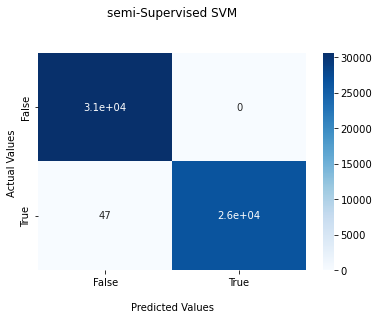

In [82]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('semi-Supervised SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()